# limitation of bag of n-grams model

**As n increased dimensionality, sparsity increases** <br>
**Doesn't address out of vocabulary(oov) problem**

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
 

In [ ]:
import spacy
nlp=spacy.load("en_core_web_lg")
doc=nlp("dog is cat banana asdfsdf")
for token in doc:
    print(token.text,token.is_oov)
# for word in nlp.vocab:
#     print(word.text)
"is" in nlp.vocab

In [2]:
v=CountVectorizer(ngram_range=(1,3))
# here n_gram is range in which you want bag of words and vectorize it 
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [3]:
#if range is (2,2)
v=CountVectorizer(ngram_range=(2,2))
# here n_gram is range in which you want bag of words 
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor hathodawala': 4,
 'hathodawala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for job': 0}

In [4]:
corpus= [
    "thor ate pizza",
    "Loki is tall",
    "loki is eating Pizza"
]

In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)
    filtered_tokens =[]
    for  token in doc:
        if token.is_stop or token.is_punct:# removing stop words and punctuation 
            continue
        filtered_tokens.append(token.lemma_) #Lemmatizing the word
    return " ".join(filtered_tokens)

In [6]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [7]:
corpus_processed = [preprocess(text)for text in corpus] # removing from corpus
corpus_processed

['thor eat pizza', 'Loki tall', 'loki eat Pizza']

In [8]:
v=CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [9]:
v.transform(["thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [10]:
v.transform(["Hulk eat Pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [11]:
v.get_feature_names_out()[5]
# checking features in vocabulary

'pizza'

In [12]:
import pandas as pd

In [13]:
df = pd.read_json("news_dataset.json")

print(df.shape)
df

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME
...,...,...
12690,Coach Shakes Hands Of Imaginary Players After ...,SPORTS
12691,This Minivan-Sized Sea Sponge Is Thought To Be...,SCIENCE
12692,RECAP: Dramatic Eclipse Photos Don't miss the ...,SCIENCE
12693,Richard Sherman Wants To Talk About Police Sho...,SPORTS


In [14]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

**making Unbalanced data, Balanced**

In [15]:
#here dataset is imbalanced so, we will do under sampling
min_samples=1381
#making every sample as size of minimum sample ,it is not good method but we will use it here .
df_business=df[df.category=="BUSINESS"].sample(min_samples,random_state=2022)
df_sports=df[df.category=="SPORTS"].sample(min_samples,random_state=2022)
df_crime=df[df.category=="CRIME"].sample(min_samples,random_state=2022)
df_science=df[df.category=="SCIENCE"].sample(min_samples,random_state=2022)

In [16]:
#pd.concat add bunch of data frames  add them row by row 
df_balanced=pd.concat([df_business,df_sports,df_crime,df_science],axis=0) #Axis =0 is row and 1 is columns

In [17]:
df_balanced.category.value_counts()
# now we are here with balanced dataset 

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

## converting text data of category to numeric data

In [18]:
df_balanced['category_num']=df_balanced.category.map({
    'BUSINESS':0,
    'SPORTS':1,
    'CRIME':2,
    'SCIENCE':3
})
# we are using map for function for maping data in category 

In [19]:
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_balanced.text,
                                                 df_balanced.category,
                                                 test_size=0.2,
                                                 random_state=2022,
                                    stratify = df_balanced.category_num
  #stratify make no of sample for all different  category similar (because while spliting again it become unbalanced)
                                                )

In [40]:
y_train.value_counts()

SCIENCE     1105
CRIME       1105
BUSINESS    1105
SPORTS      1104
Name: category, dtype: int64

In [41]:
y_test.value_counts()

SPORTS      277
BUSINESS    276
SCIENCE     276
CRIME       276
Name: category, dtype: int64

### Creating sklearn Pipeline
**here we will use  BOW and naive Bayes classification**

In [42]:
# naive bayes is reccomanded for text based classification but we can use
# any of like random forest, decision tree etc
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [43]:
clf = Pipeline([
    ('vectorizer_bow',CountVectorizer()), #here we are using bow means 1 gram
    ('Multi NB', MultinomialNB())
])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    BUSINESS       0.75      0.87      0.81       276
       CRIME       0.83      0.90      0.86       276
     SCIENCE       0.90      0.80      0.85       276
      SPORTS       0.93      0.80      0.86       277

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



### Creating sklearn Pipeline
**here we will use Bag of n-grams and naive Bayes classification**

In [44]:
# naive bayes is reccomanded for text based classification but we can use
# any of like random forest, decision tree etc
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range=(1,2))), #here we are using bow means 1 gram
    ('Multi NB', MultinomialNB())
])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    BUSINESS       0.69      0.90      0.78       276
       CRIME       0.82      0.88      0.85       276
     SCIENCE       0.92      0.78      0.84       276
      SPORTS       0.95      0.74      0.83       277

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



**result out of trying on n_gram and BOW** :<br>
* we find out that for particular dataset BOW is good choice but it may changes from dataset to dataset

In [45]:
X_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [46]:
y_test[:5]

3716     BUSINESS
608       SCIENCE
11172     SCIENCE
1346     BUSINESS
1356        CRIME
Name: category, dtype: object

In [47]:
y_pred[:5]

array(['BUSINESS', 'BUSINESS', 'SCIENCE', 'BUSINESS', 'CRIME'],
      dtype='<U8')

* we find out of that 4 out of 5 are predicted correctly

### now we are doing preprocessing on our text and  creating preprocessing text column

In [52]:
df_balanced['preprocessed_text']=df_balanced.text.apply(preprocess)
#we have already created preprocess function above so we are directly applying it on our data

In [53]:
df_balanced.head() 

,text,category,category_num,preprocessed_text
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,gcc Business leader remain Confident face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks talk give build ...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


### now we will apply same model on preprocessed text

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_balanced.preprocessed_text,
                                                 df_balanced.category,
                                                 test_size=0.2,
                                                 random_state=2022,
                                    stratify = df_balanced.category_num
  #stratify make no of sample for all different  category similar (because while spliting again it become unbalanced)
                                                )

In [55]:
# naive bayes is reccomanded for text based classification but we can use
# any of like random forest, decision tree etc
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range=(1,2))), #here we are using bow means 1 gram
    ('Multi NB', MultinomialNB())
])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    BUSINESS       0.80      0.88      0.84       276
       CRIME       0.83      0.92      0.87       276
     SCIENCE       0.91      0.81      0.86       276
      SPORTS       0.92      0.83      0.87       277

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



**while comparing performance of row text and pre-processed text we found that preprocessed text gives better performance in almost all parameter than un processed text**

 ## plotting Confusion Matrix 

In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[242,  15,  10,   9],
       [ 15, 255,   5,   1],
       [ 34,   8, 224,  10],
       [ 10,  29,   8, 230]], dtype=int64)

Text(69.0, 0.5, 'truth')

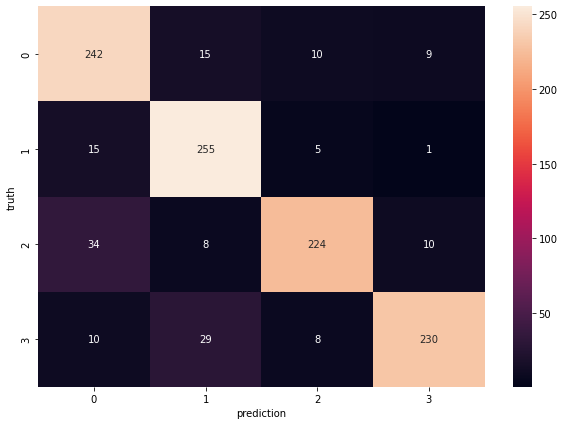

In [59]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("prediction")
plt.ylabel("truth")